### 1. Using a data set of your choice, write an introduction explaining the data set.

### 2. Identify a question or question(s) that you would like to explore in your data set.

As an airline performance measure, I am hoping to address the following questions - 
1. What causes most delays. 
2. Which carrier has the most cancellations.
3. Which airport has the most delays
4. Which carrier has the best on-time performance.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset as a Pandas data frame.
may_airline_data_df = pd.read_csv('May.csv') 
may_airline_data_df.shape

may_airline_data_df.head() 

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,...,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2022,2,5,1,7,5/1/2022 0:00,AA,AA,10140,ABQ,...,0,104.0,71.0,1,569,NaN,NaN,NaN,NaN,NaN
1,2022,2,5,1,7,5/1/2022 0:00,AA,AA,10140,ABQ,...,0,97.0,72.0,1,569,NaN,NaN,NaN,NaN,NaN
2,2022,2,5,1,7,5/1/2022 0:00,AA,AA,10140,ABQ,...,0,98.0,73.0,1,569,NaN,NaN,NaN,NaN,NaN
3,2022,2,5,1,7,5/1/2022 0:00,AA,AA,10140,ABQ,...,0,110.0,73.0,1,569,NaN,NaN,NaN,NaN,NaN
4,2022,2,5,1,7,5/1/2022 0:00,AA,AA,10140,ABQ,...,0,93.0,72.0,1,569,NaN,NaN,NaN,NaN,NaN


In [197]:
#Since the number of rows are very high (over 600000), we'll narrow the research to flights between major 20 airports.

#Filtering ORIGIN airports
may_airline_data_df = may_airline_data_df.loc[(may_airline_data_df.ORIGIN == "ORD") | (may_airline_data_df.ORIGIN == "ATL") |
                                    (may_airline_data_df.ORIGIN == "DFW") | (may_airline_data_df.ORIGIN == "DEN") |
                                    (may_airline_data_df.ORIGIN == "EWR") | (may_airline_data_df.ORIGIN == "LAX") |
                                    (may_airline_data_df.ORIGIN == "IAH") | (may_airline_data_df.ORIGIN == "PHX") |
                                    (may_airline_data_df.ORIGIN == "DTW") | (may_airline_data_df.ORIGIN == "SFO") |
                                    (may_airline_data_df.ORIGIN == "LAS") | (may_airline_data_df.ORIGIN == "DEN") |
                                    (may_airline_data_df.ORIGIN == "ORD") | (may_airline_data_df.ORIGIN == "JFK") |
                                    (may_airline_data_df.ORIGIN == "CLT") | (may_airline_data_df.ORIGIN == "LGA") |
                                    (may_airline_data_df.ORIGIN == "MCO") | (may_airline_data_df.ORIGIN == "MSP") |
                                    (may_airline_data_df.ORIGIN == "BOS") | (may_airline_data_df.ORIGIN == "PHL") ]

#Filtering DESTINATION airports
may_airline_data_df = may_airline_data_df.loc[(may_airline_data_df.DEST == "ORD") | (may_airline_data_df.DEST == "ATL") |
                                    (may_airline_data_df.DEST == "DFW") | (may_airline_data_df.DEST == "DEN") |
                                    (may_airline_data_df.DEST == "EWR") | (may_airline_data_df.DEST == "LAX") |
                                    (may_airline_data_df.DEST == "IAH") | (may_airline_data_df.DEST == "PHX") |
                                    (may_airline_data_df.DEST == "DTW") | (may_airline_data_df.DEST == "SFO") |
                                    (may_airline_data_df.DEST == "LAS") | (may_airline_data_df.DEST == "DEN") |
                                    (may_airline_data_df.DEST == "ORD") | (may_airline_data_df.DEST == "JFK") |
                                    (may_airline_data_df.DEST == "CLT") | (may_airline_data_df.DEST == "LGA") |
                                    (may_airline_data_df.DEST == "MCO") | (may_airline_data_df.DEST == "MSP") |
                                    (may_airline_data_df.DEST == "BOS") | (may_airline_data_df.DEST == "PHL") ]

len(may_airline_data_df)

100380

#### Data Modification for plotting

In [198]:
#1. Cancellation code is mentioned as A, B, C, D. Updating it to actual reason based on DOT data.
 
may_airline_data_df['CANCELLATION_REASON'] =  np.where(may_airline_data_df.CANCELLATION_CODE=='A', 'Carrier',
                                                       np.where(may_airline_data_df.CANCELLATION_CODE=='B', 'Weather',
                                                                np.where(may_airline_data_df.CANCELLATION_CODE=='C', 'National Air System',
                                                                         np.where(may_airline_data_df.CANCELLATION_CODE=='D', 'Security',''))))


may_airline_data_df.groupby(['CANCELLATION_REASON'])['CANCELLATION_REASON'].count().sort_index()

CANCELLATION_REASON
                       98134
Carrier                 1139
National Air System      379
Weather                  728
Name: CANCELLATION_REASON, dtype: int64

In [199]:
#2. Creating a flag for delayed flights
#For the purposes of this analysis, we are considering flights with arrival time less than 15 minutes as on-time.

may_airline_data_df.loc[(may_airline_data_df['ARR_DELAY']>15), 'DELAYED'] = True
may_airline_data_df.loc[(may_airline_data_df['ARR_DELAY']<=15), 'DELAYED'] = False

may_airline_data_df.groupby(['DELAYED'])['DELAYED'].count().sort_index()

DELAYED
False    75723
True     22196
Name: DELAYED, dtype: int64

In [200]:
#3. Adding a new column Delay_Reason based on delay columns
may_airline_data_df['DELAY_REASON'] = np.where(((may_airline_data_df.DELAYED==True) & (may_airline_data_df.CARRIER_DELAY != 0)), 'Carrier',
                                          np.where(((may_airline_data_df.DELAYED==True) & (may_airline_data_df.LATE_AIRCRAFT_DELAY != 0)), 'LateAircraft',
                                                   np.where(((may_airline_data_df.DELAYED==True) & (may_airline_data_df.WEATHER_DELAY != 0)), 'Weather',
                                                            np.where(((may_airline_data_df.DELAYED==True) & (may_airline_data_df.NAS_DELAY != 0)), 'NAS',
                                                                     np.where(((may_airline_data_df.DELAYED==True) & (may_airline_data_df.SECURITY_DELAY != 0)), 'Security','')))))

may_airline_data_df.groupby(['DELAY_REASON'])['DELAY_REASON'].count().sort_values()

DELAY_REASON
Security           16
Weather           693
LateAircraft     3748
NAS              3938
Carrier         13801
                78184
Name: DELAY_REASON, dtype: int64

In [201]:
#4. Adding a new column Status 
may_airline_data_df['STATUS'] = ''
may_airline_data_df.STATUS = np.where(may_airline_data_df.CANCELLED==1, 'Cancelled',
                                 np.where(may_airline_data_df.DIVERTED==1, 'Diverted',
                                          np.where(may_airline_data_df.ARR_DELAY<=15, 'On-Time',
                                                   np.where(may_airline_data_df.ARR_DELAY>15, 'Delayed',''))))
may_airline_data_df.groupby(['STATUS'])['STATUS'].count().sort_index()

STATUS
Cancelled     2246
Delayed      22196
Diverted       215
On-Time      75723
Name: STATUS, dtype: int64

### 3. Create at least three graphs that help answer these questions.  

#### HISTOGRAM

#### i. What caused the most number of delays?

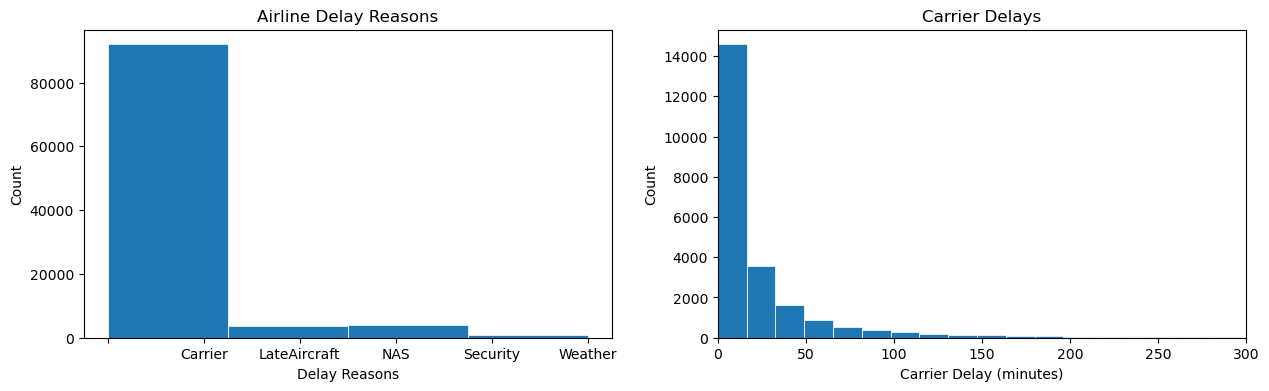

In [202]:
#Number of delays by Delay Reason
may_airline_data_df = may_airline_data_df.sort_values(['DELAY_REASON'])
fig,((ax0,ax1)) = plt.subplots(1,2, figsize=(15, 4))
ax0.hist(may_airline_data_df.DELAY_REASON, bins=4, linewidth=0.5, edgecolor="white") 
ax0.set(xlabel='Delay Reasons',ylabel='Count',title='Airline Delay Reasons')

ax1.hist(may_airline_data_df.CARRIER_DELAY, bins=90, linewidth=0.5, edgecolor="white") 
ax1.set_xlim([0, 300])
ax1.set(xlabel='Carrier Delay (minutes)',ylabel='Count',title='Carrier Delays')
 
plt.show() 

May'22 had most Delays due to Carriers.
We can see most carrier delays are between 0 to 25 minutes.

#### BAR PLOTS for Airport and Airline Performance

#### ii. Which airline had the most cancellations?

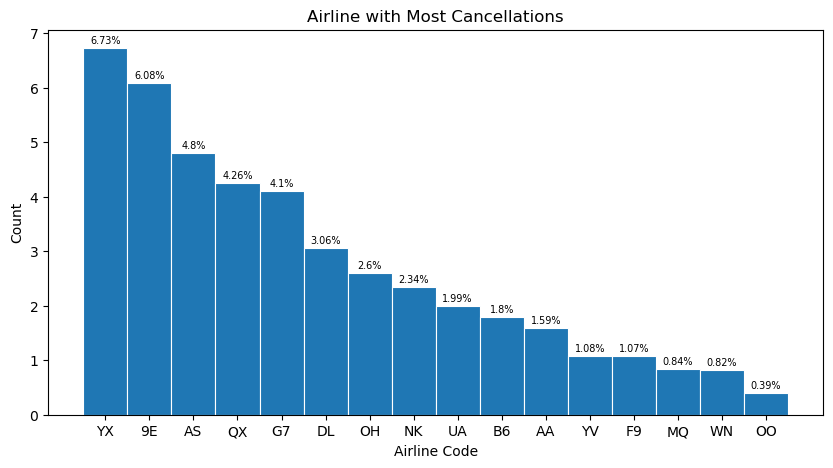

In [207]:
#Calculate total flight performance percentage per airline
flight_totals = may_airline_data_df.value_counts(subset=['OP_UNIQUE_CARRIER']).reset_index() 
flight_totals_df = pd.DataFrame(flight_totals)
flight_totals_df.columns = ['OP_UNIQUE_CARRIER','TOTAL']
flight_totals_df['PERCENTAGE'] = round(flight_totals_df.TOTAL/flight_totals_df.TOTAL.sum()*100,2)

flight_totals_df = flight_totals_df.sort_values('PERCENTAGE',ascending=False)
 
#Calculate performance percentage by status per airline
flight_status = may_airline_data_df.value_counts(subset=['OP_UNIQUE_CARRIER','STATUS']).reset_index() 
flight_status_df = pd.DataFrame(flight_status)
flight_status_df.columns = ['OP_UNIQUE_CARRIER','STATUS', 'COUNT']
flight_status_df = flight_status_df.sort_values('OP_UNIQUE_CARRIER')

flight_status_df['PERCENTAGE'] = ''
            
for index, row in flight_status_df.iterrows():
    tot = flight_totals.loc[flight_totals.OP_UNIQUE_CARRIER==row.OP_UNIQUE_CARRIER].TOTAL.values
    val = (row.COUNT/tot * 100)   
    flight_status_df.at[index,'PERCENTAGE'] = round(val[0].astype(float),2) 
    
# Plot cancellations per airline by only selecting the Cancelled status from flight_status_df
cancelled_performance = flight_status_df[flight_status_df.STATUS == 'Cancelled'].sort_values('PERCENTAGE',ascending=False)
cancelled_performance = cancelled_performance.sort_values('PERCENTAGE',ascending=False)

fig, ax = plt.subplots(figsize=(10,5))

plot_1 = ax.bar(cancelled_performance.OP_UNIQUE_CARRIER, cancelled_performance.PERCENTAGE, width=1, edgecolor="white", linewidth=0.8)

for bar_1 in plot_1:
    height = bar_1.get_height()
    plt.annotate( "{}%".format(height),(bar_1.get_x() + bar_1.get_width()/2 , height+.05),ha="center",va="bottom",fontsize=7)
 
plt.xlabel("Airline Code")
plt.ylabel("Count")
plt.title("Airline with Most Cancellations")
plt.show()

Refering to the Bureau of Transporation Statistics for airline codes : https://www.bts.gov/topics/airlines-and-airports/airline-codes

YX - Republic Airways had most number of cancellations in the May'22 between the major US airports. 

#### iii. Which airport has the most delays

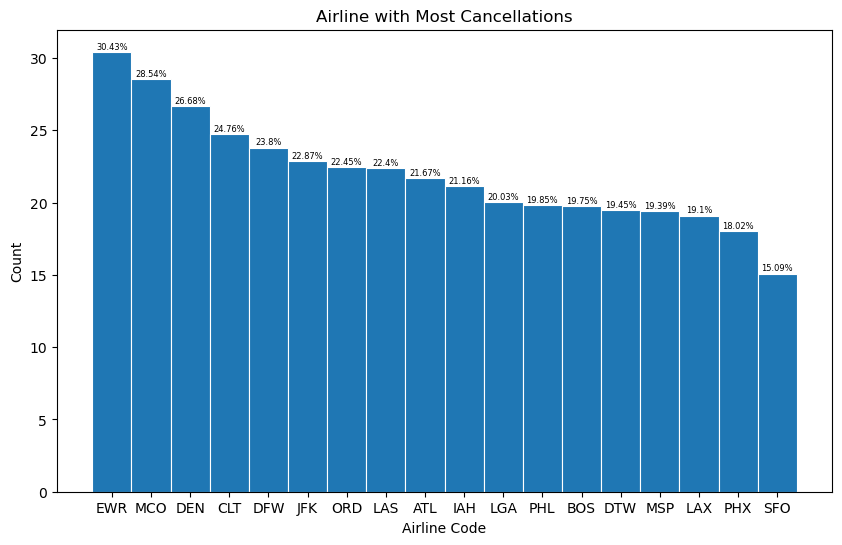

In [206]:
#Calculate total flight performance percentage per airport
airport_totals = may_airline_data_df.value_counts(subset=['ORIGIN']).reset_index() 
airport_totals_df = pd.DataFrame(airport_totals)
airport_totals_df.columns = ['ORIGIN','TOTAL']
airport_totals_df['PERCENTAGE'] = round(airport_totals_df.TOTAL/airport_totals_df.TOTAL.sum()*100,2)

airport_totals_df = airport_totals_df.sort_values('PERCENTAGE',ascending=False)
 
#Calculate performance percentage by status per airport
airport_status = may_airline_data_df.value_counts(subset=['ORIGIN','STATUS']).reset_index() 
airport_status_df = pd.DataFrame(airport_status)
airport_status_df.columns = ['ORIGIN','STATUS', 'COUNT']
airport_status_df = airport_status_df.sort_values('ORIGIN')

airport_status_df['PERCENTAGE'] = ''
            
for index, row in airport_status_df.iterrows():
    tot = airport_totals_df.loc[airport_totals_df.ORIGIN==row.ORIGIN].TOTAL.values
    val = (row.COUNT/tot * 100)   
    airport_status_df.at[index,'PERCENTAGE'] = round(val[0].astype(float),2) 

# Selecting the Delayed status from airport_status_df
airport_performance = airport_status_df[airport_status_df.STATUS == 'Delayed'].sort_values('PERCENTAGE',ascending=False)
airport_performance = airport_performance.sort_values('PERCENTAGE',ascending=False)

# Plot delays by airport by only selecting the Delayed status 
fig, ax = plt.subplots(figsize=(10,6))
plot_1 = ax.bar(airport_performance.ORIGIN, airport_performance.PERCENTAGE, width=1, edgecolor="white", linewidth=0.8)

for bar_1 in plot_1:
    height = bar_1.get_height()
    plt.annotate( "{}%".format(height),(bar_1.get_x() + bar_1.get_width()/2 , height+.05),ha="center",va="bottom",fontsize=6)
plt.xlabel("Airline Code")
plt.ylabel("Count")
plt.title("Airline with Most Cancellations")
plt.show()

Newark and Orlando airports had the most delays in May 2022. 

#### PIE CHART

#### iv. Which airline has the best on-time performance?

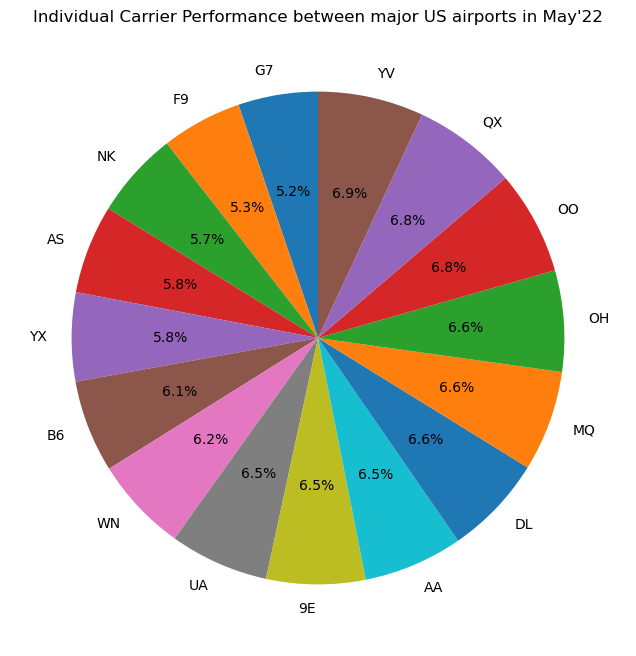

In [189]:
on_time_performance_df = flight_status_df[flight_status_df.STATUS=='On-Time']
on_time_performance_df = on_time_performance_df.sort_values(['PERCENTAGE'])

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(on_time_performance_df.PERCENTAGE, labels=on_time_performance_df.OP_UNIQUE_CARRIER, 
        autopct='%1.1f%%', startangle=90) 
plt.title("Individual Carrier Performance between major US airports in May'22") 
plt.show()

YV - Mesa Airline has the best on-time performance with 6.9%

### 5. Write a conclusion that summarizes your findings.

Analyzing airline performance data for May 2022, we can see that Hawaian Airline has the best on-time performance. 
I had initially assumed most airline delays would be from weather, but from the research it appears most delays 
are due to Carriers and Late Aircrafts.
For flights flown between major US airports in May'2022, EWR has the most delays.